In [23]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_filepath = "~/dev/git/zoonosis/input/data/hev/aligned/hev_{orf}_alignment_ba.fasta_processed.csv"
orf1_df = pd.read_csv(data_filepath.format(orf="orf1"))
orf1_df["orf"] = "orf1"
orf2_df = pd.read_csv(data_filepath.format(orf="orf2"))
orf2_df["orf"] = "orf2"
orf3_df = pd.read_csv(data_filepath.format(orf="orf3"))
orf3_df["orf"] = "orf3"
orf4_df = pd.read_csv(data_filepath.format(orf="orf4"))
orf4_df["orf"] = "orf4"
orf_df = pd.concat([orf1_df, orf2_df, orf3_df, orf4_df])
orf_df

,id,region,host,genotype,host-genotype,sequence,orf
0,QJQ50412.1,ORF1,Avian,unknown,Avian-unknown,-MDVSQFAESKGVKTALEAAALAAANTALRNARVVTPYLTQQQTKN...,orf1
1,UNQ84074.1,ORF1,Avian,unknown,Avian-unknown,-MDVSQFAESKGVKTALEAAALAAANTALRNARVVTPYLTQQQTKN...,orf1
2,AAS45830.1,ORF1,Avian,unknown,Avian-unknown,-MDVSQFAESKGVKTALEAAALAAANTALRNARVVTPYLTQQQTKN...,orf1
3,YP_009001465.1,ORF1,Avian,unknown,Avian-unknown,-MDVSQFAESKGVKTALEAAALAAANTALRNARVVTPYLTQQQTKN...,orf1
4,UFQ90535.1,ORF1,Avian,unknown,Avian-unknown,-MDVSQFAESKGVKTALEAAALAAANTALRNARVVTPYLTQQQTKN...,orf1
...,...,...,...,...,...,...,...
17,BCG49787.1,ORF4,Rodent,NaN,Rodent-nan,MSPPRGLILLGRPRLLRQRLPPLLMLRWFAPTCRILKLPCLLSSFP...,orf4
18,UDN81818.1,ORF4,Rodent,unknown,Rodent-unknown,MSPPRGLILLGRPRPLRQRLPPLLMLRWFAPTCRILKLPCLLSFSP...,orf4
19,UDP83064.1,ORF4,Rodent,unknown,Rodent-unknown,MSPPRGLTLLGRPRLLRQRLPPLLMLRWYAPTCRILKLPFLLSFSP...,orf4
20,UCR91748.1,ORF4,Hare,unknown,Hare-unknown,MSPPWGYRQLGRHRLQRPRLPRLLMLTWFARSCRMPRLRFLLNSFP...,orf4


In [14]:
def analyze_dataset(df):
    print(f"Size of DF = {df.shape}")
    print(f"Aligned sequence length = {len(df['sequence'].values[0])}")
    print("Host stats")
    print(f"{df['host'].value_counts()}")
    return df['host'].value_counts()

In [15]:
order = analyze_dataset(orf1_df)

Size of DF = (954, 7)
Aligned sequence length = 2481
Host stats
Human                                698
Boar                                 118
Leporidae                             38
Rodent                                30
Unknown                               19
Avian                                 16
Camel                                  8
Ferret                                 8
culture supernatant (Unknown map)      4
Mongoose                               3
Primate                                3
Bat                                    3
Deer                                   2
Shrew                                  2
Canine                                 1
Hare                                   1
Name: host, dtype: int64


In [27]:
plot_order = order.index.values
plot_order

array(['Human', 'Boar', 'Leporidae', 'Rodent', 'Unknown', 'Avian',
       'Camel', 'Ferret', 'culture supernatant (Unknown map)', 'Mongoose',
       'Primate', 'Bat', 'Deer', 'Shrew', 'Canine', 'Hare'], dtype=object)

In [30]:
plot_order = np.delete(plot_order, [4, 8])

In [6]:
analyze_dataset(orf2_df)

Size of DF = (935, 7)
Aligned sequence length = 794
Host stats
Human                                694
Boar                                 118
Leporidae                             38
Rodent                                30
Unknown                               12
Avian                                  9
Camel                                  8
Ferret                                 8
culture supernatant (Unknown map)      4
Mongoose                               3
Primate                                3
Deer                                   2
Shrew                                  2
Bat                                    2
Canine                                 1
Hare                                   1
Name: host, dtype: int64


In [7]:
analyze_dataset(orf3_df)

Size of DF = (933, 7)
Aligned sequence length = 337
Host stats
Human                                695
Boar                                 115
Leporidae                             37
Rodent                                31
Unknown                               12
Avian                                  9
Camel                                  8
Ferret                                 8
culture supernatant (Unknown map)      4
Primate                                3
Mongoose                               3
Bat                                    3
Deer                                   2
Shrew                                  2
Hare                                   1
Name: host, dtype: int64


In [8]:
analyze_dataset(orf4_df)

Size of DF = (22, 7)
Aligned sequence length = 183
Host stats
Rodent     9
Ferret     8
Human      2
Unknown    1
Shrew      1
Hare       1
Name: host, dtype: int64


In [12]:
orf_df_copy = orf_df.copy()
orf_df_copy = orf_df_copy[~orf_df_copy["host"].isin(["Unknown", "culture supernatant (Unknown map)"])]

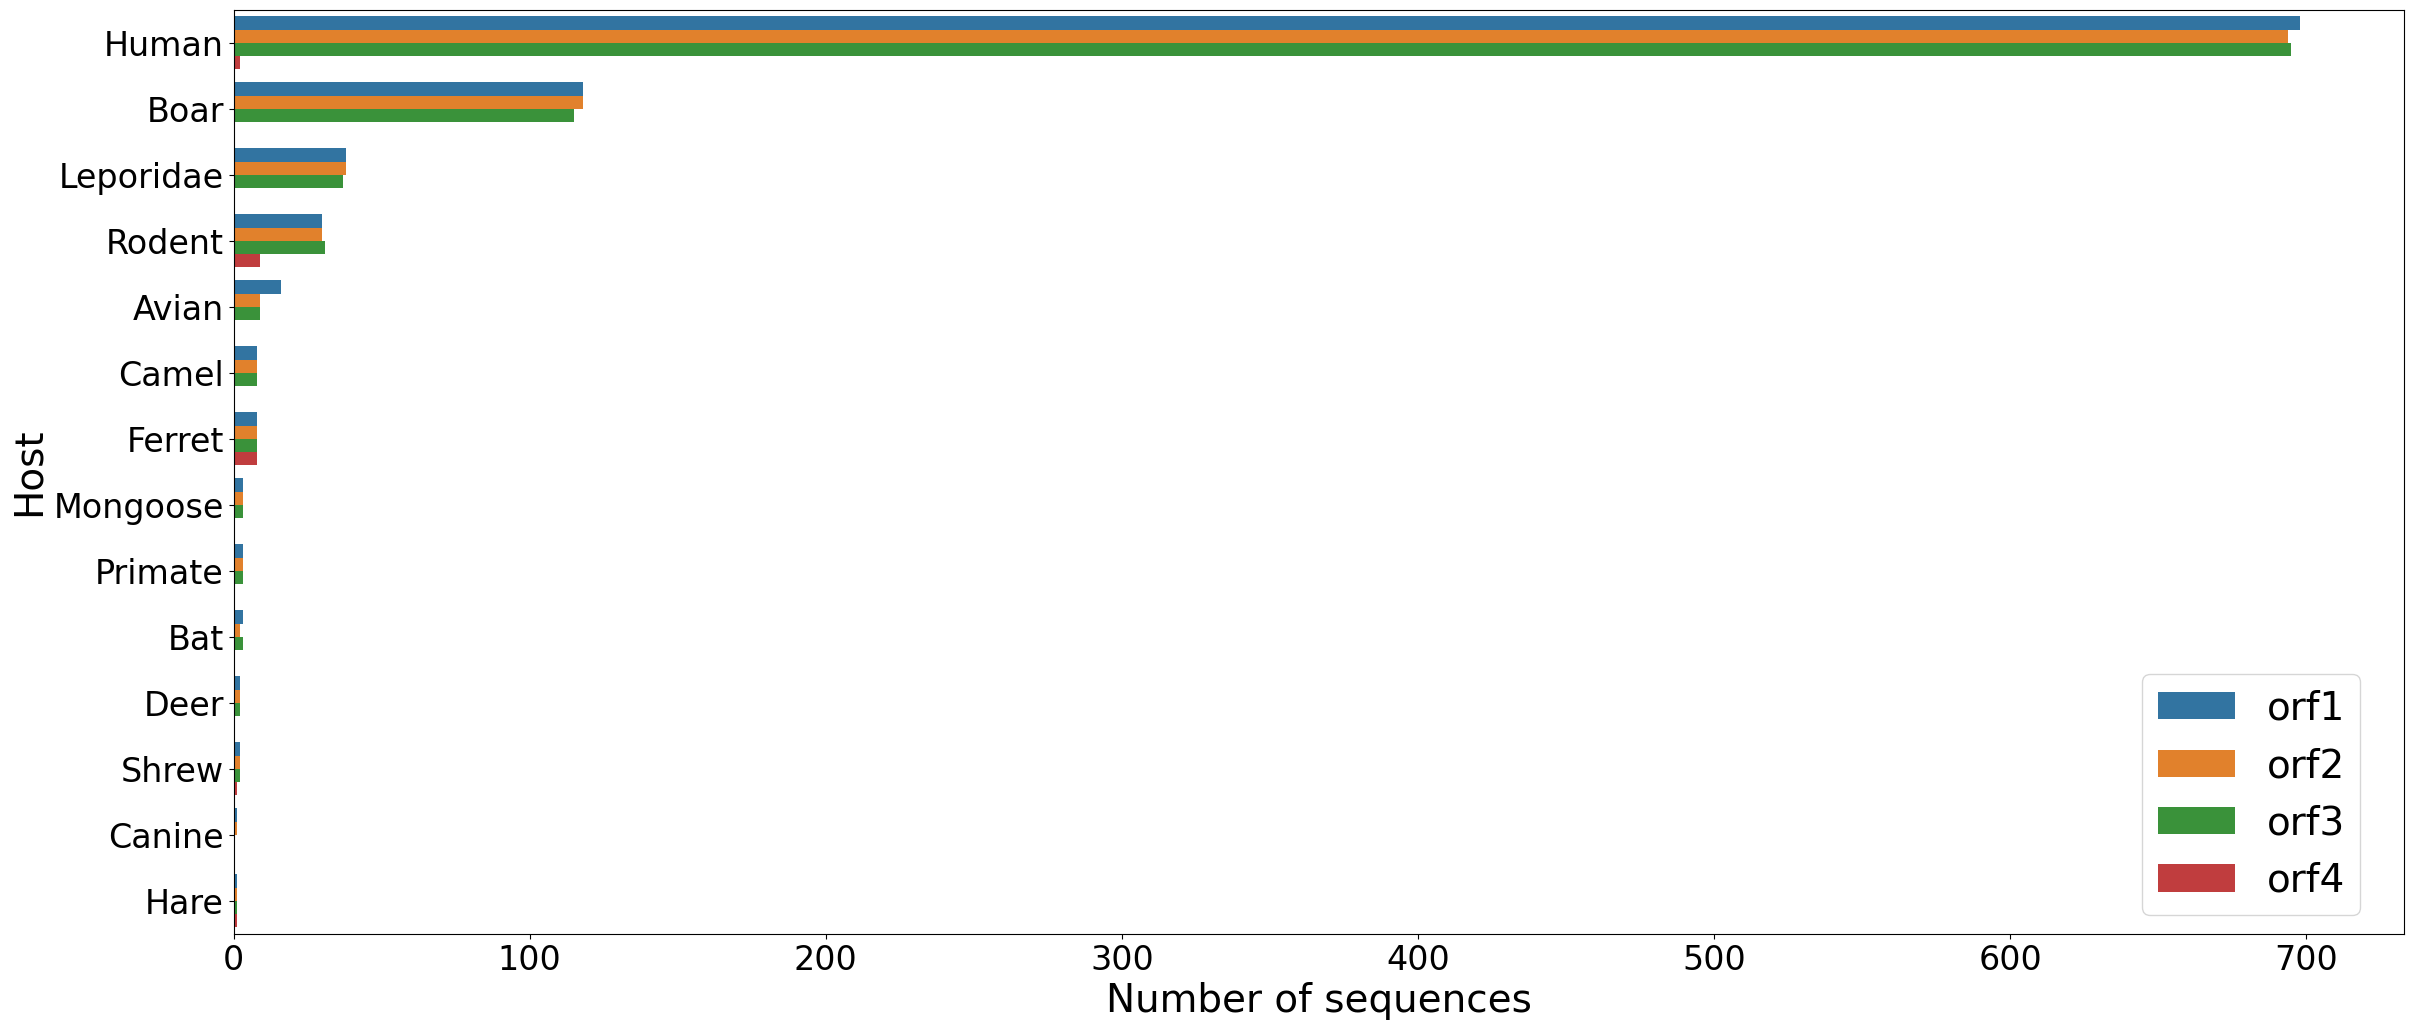

In [32]:
plt.figure(figsize=(28,12))
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
sns.countplot(orf_df_copy, y="host", hue="orf", order=plot_order)
plt.xlabel('Number of sequences', fontsize=28)
plt.ylabel('Host', fontsize=28)
plt.legend(bbox_to_anchor=(0.98, 0.02), loc='lower right', borderaxespad=0, prop={'size': 28})
plt.show()